<a href="https://colab.research.google.com/github/neslhan00/works/blob/main/MyPractices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neslihan Gül

# PRACTICES


Some of the practices I have done while learning python.

LONGEST VACATION CALCULATOR


In this procedure I wrote a function, longest vacation(days off, year), that determines the optimal days to use
the vacation entitlement to achieve the longest consecutive vacation period in a given year where the user has 3 to 10 days for a year in the range 1980−2030.

Table of the vacations I used in my calculations:

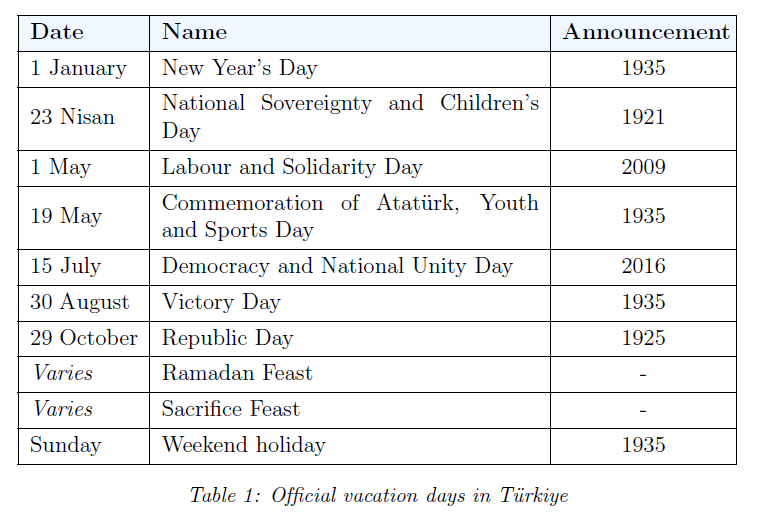

In [ ]:
def longest_vacation(days_off, year):
    # Helper function: Check if the year is a leap year
    def is_leap_year(year):
        return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

    # Helper function: Calculate the weekday of Jan 1 for a given year
    def jan_first_weekday(year):
        total_days = 0
        for y in range(1900, year):
            total_days += 366 if is_leap_year(y) else 365
        return total_days % 7  # Returns 0=Monday, ..., 6=Sunday

    # Helper function: Generate weekends
    def generate_weekends(year):
        weekends = []
        days_in_month = [31, 29 if is_leap_year(year) else 28, 31, 30, 31, 30,
                         31, 31, 30, 31, 30, 31]
        current_day = jan_first_weekday(year)

        for month in range(1, 13):
            for day in range(1, days_in_month[month - 1] + 1):
                if current_day in {5, 6}:  # Saturday or Sunday
                    weekends.append((month, day))
                current_day = (current_day + 1) % 7  # Move to the next day of the week
        return set(weekends)

    # Helper function: Get official holidays
    def get_holidays(year):
        holidays = set()
        if year >= 1935:
            holidays.update([(1, 1), (4, 23), (5, 19), (8, 30)])
        if year >= 1925:
            holidays.add((10, 29))
        if year >= 2009:
            holidays.add((5, 1))
        if year >= 2016:
            holidays.add((7, 15))
        return holidays

    # Combine holidays and weekends
    weekends = generate_weekends(year)
    holidays = get_holidays(year)
    non_working_days = weekends.union(holidays)

    # Initialize variables for finding the longest streak
    longest_streak = 0
    best_start = None
    days_in_month = [31, 29 if is_leap_year(year) else 28, 31, 30, 31, 30,
                     31, 31, 30, 31, 30, 31]

    for month in range(1, 13):
        for day in range(1, days_in_month[month - 1] + 1):
            streak = 0
            used_days_off = 0
            current_day = (month, day)

            while streak < days_off + len(non_working_days):
                if current_day in non_working_days or used_days_off < days_off:
                    streak += 1
                    if current_day not in non_working_days:
                        used_days_off += 1
                else:
                    break

                # Move to the next day
                next_day = current_day[1] + 1
                if next_day > days_in_month[current_day[0] - 1]:
                    next_day = 1
                    current_month = current_day[0] + 1
                    if current_month > 12:
                        break
                    current_day = (current_month, next_day)
                else:
                    current_day = (current_day[0], next_day)

            # Update the best vacation period
            if streak > longest_streak:
                longest_streak = streak
                best_start = (month, day)

    # Print the results
    print(f"Start your vacation on {best_start[1]}-{best_start[0]}-{year}, "
          f"you will have {longest_streak} consecutive vacation days.")

# Example usage:
longest_vacation(2, 2023)
longest_vacation(3, 2024)
longest_vacation(4, 2011)
longest_vacation(5, 1987)


PLAYLIST GENERATOR

I wrote this function to create a playlist with the songs of the given genre.
This procedure will take any desired number of music genres as input.
If these genres exist in my song dictionary, it will print the names of the songs belonging to those genres.
For genres not found in the list, it will display a message indicating that there are no songs available for that genre.
If no input is provided at all, it will print "No song requested".

In [ ]:
# This is the dictionary of the songs I will use
musics = {
    "Pop": [
        "Senorita - Shawn Mendes, Camila Cabello",
        "Shape of You - Ed Sheeran",
        "Dance Monkey - Tones and I",
        "Blinding Lights - The Weeknd"],
    "Rock": [
        "Bohemian Rhapsody - Queen",
        "Stairway to Heaven - Led Zeppelin",
        "Sweet Child o' Mine - Guns N' Roses",
        "Hotel California - Eagles"],
    "Classical": [
        "Für Elise - Ludwig van Beethoven",
        "The Four Seasons - Antonio Vivaldi",
        "Moonlight Sonata - Ludwig van Beethoven",
        "Canon in D - Johann Pachelbel",
        "Symphony No. 9 - Ludwig van Beethoven"],
    "Jazz": [
        "Take Five - Dave Brubeck",
        "Fly Me to the Moon - Frank Sinatra",
        "What a Wonderful World - Louis Armstrong",
        "Feeling Good - Nina Simone"]}


def make_playlist(*genres):
  if not genres:
    print("No")
    return

  genres = list(set(genres))
  for genre in genres:
    if genre in musics:
      for song in musics[genre]:
        print(genre, song[:song.find("-")])
  for genre in genres:
    if genre not in musics:
      print(f"\tI don't have any \"{genre}\" song in my repertoire.")

In [ ]:
# Tests
make_playlist("Jazz", "Jazz", "Rock", "hey" )
print("\n")

make_playlist("Jazz", "Jazz", "Jazz", "Jazz", "Jazz", "Jazz", "Rock")
print("\n")

make_playlist()
print("\n")

make_playlist("Blues")

Jazz Take Five 
Jazz Fly Me to the Moon 
Jazz What a Wonderful World 
Jazz Feeling Good 
Rock Bohemian Rhapsody 
Rock Stairway to Heaven 
Rock Sweet Child o' Mine 
Rock Hotel California 
	I don't have any "hey" song in my repertoire.


Jazz Take Five 
Jazz Fly Me to the Moon 
Jazz What a Wonderful World 
Jazz Feeling Good 
Rock Bohemian Rhapsody 
Rock Stairway to Heaven 
Rock Sweet Child o' Mine 
Rock Hotel California 


No


	I don't have any "Blues" song in my repertoire.


MARBLE GAME

There are 50 marbles in a bag, and there are two players
The game is based on the principle that two players take turns removing 1 to 5 marbles from the bag, and the player who removes the last marble wins.
In other words, the player who cannot make a move loses the game.

The marbles removed are not returned to the bag, meaning
the number of marbles will continuously decrease.

In [ ]:
marble = 50
valid_moves = ["1", "2", "3", "4", "5"]
while marble >= 0:
    print("It's Player 1's turn. There are", marble, "marbles in the bag.")
    x = input("Player 1, how many marbles will you take? ")
    while x not in valid_moves or int(x) > marble:  # int(x) won't give an error because the first condition stops evaluation if x not in valid moves
        print("Invalid move.")
        print("There are", marble, "marbles in the bag.")
        x = input("Player 1, how many marbles will you take? ")
    if x in valid_moves:
        x = int(x)
        marble -= x

    if marble == 0:
        print("Player 1 wins!")
        break

    print("It's Player 2's turn. There are", marble, "marbles in the bag.")
    y = input("Player 2, how many marbles will you take? ")
    while y not in valid_moves or int(y) > marble:
        print("Invalid move.")
        print("There are", marble, "marbles in the bag.")
        y = input("Player 2, how many marbles will you take? ")
    if y in valid_moves:
        y = int(y)
        marble -= y

    if marble == 0:
        print("Player 2 wins!")
        break

It's Player 1's turn. There are 50 marbles in the bag.
Player 1, how many marbles will you take? 5
It's Player 2's turn. There are 45 marbles in the bag.
Player 2, how many marbles will you take? 5
It's Player 1's turn. There are 40 marbles in the bag.
Player 1, how many marbles will you take? 5
Player 2, how many marbles will you take? 5
It's Player 2's turn. There are 35 marbles in the bag.
It's Player 1's turn. There are 30 marbles in the bag.
Player 1, how many marbles will you take? 5
It's Player 2's turn. There are 25 marbles in the bag.
Player 2, how many marbles will you take? 5
It's Player 1's turn. There are 20 marbles in the bag.
Player 1, how many marbles will you take? 4
It's Player 2's turn. There are 16 marbles in the bag.
Player 2, how many marbles will you take? 3
It's Player 1's turn. There are 13 marbles in the bag.
Player 1, how many marbles will you take? 5
It's Player 2's turn. There are 8 marbles in the bag.
Player 2, how many marbles will you take? 2
It's Player

DNA CODON COUNTER

I wrote this procedure that takes a chain as its input, and outputs the number of the amino acids the synthesized protein will consist of when the ribosom reads the chain.


How the procedure works:


For protein
synthesis to begin, the ribosome must reach the AUG codon on this chain. When the ribosome
arrives at the UAG, UAA, or UGA codons, protein synthesis terminates. The starting codon,
AUG, is included in the structure of the synthesized protein, but the stop codons are excluded.

In [ ]:
def count_aa(chain):

  # finding where to start
  start = chain.find("AUG")
  if start == -1:
    print("No start codon")
    return None

  else:
    chain = chain[start:] # Update the chain. Get rid of the unnecessary part


  #finding where to end
  search = 0
  codons = int(len(chain)/3)
  is_end = 0

  while search <= codons:
    if chain[is_end: is_end +3] == "UAG" or chain[is_end: is_end +3] == "UAA":
      chain = chain[:is_end]
      codons = int( len(chain)/3 )
      return codons

    if chain[is_end: is_end +3] == "UGA":
      chain = chain[:is_end]
      codons = int(len(chain)/3 )
      return codons

    else:
      is_end = is_end+3 #keep searching
      search = search + 1

    if search == codons: #loop is ended and we coudn't find anything
      print("There is no stop codon")
      return None



#tests
chain1 = "UGGCUAUGUAUGGGUUUGGCUCCUAGAUAGACAUACGAAUGU"
chain2 = "UGGCUAUGUAUGGGUUUGGCUCCUAGA"
chain3 = "UGGCUAUGUAGGGGUUUGGCUCCUAGA"
chain4 = "AUGUCCCUGA"
chain5 = "AUAUAUAUAUUA"

print(count_aa(chain1))
print("\n")
print(count_aa(chain2))
print("\n")
print(count_aa(chain3))
print("\n")
print(count_aa(chain4))
print("\n")
print(count_aa(chain5))

6


6


1


There is no stop codon
None


No start codon
None


PASSWORD CHECKER


This procedure will take a password as its input,
perform some checks on that password, and determine whether this number can be used as a
password. Depending on the number, it will print to the screen whether the number can be
used as a password and indicate its strength. The rules to be checked when creating a password
are as follows:

a) Passwords must be in the form of three digits such as abc where a, b and c are numbers.


b) If the digits of the password are different, the digits are in ascending or descending order,
and the password is an odd number, the procedure prints medium-strength
password to the screen.


c) If the digits of the password are different, the digits are in ascending or descending order,
and the password is an even number, the procedure prints weak password to the
screen.


d) If any two digits of the password are the same, and these digits are not adjacent, the
procedure prints medium-strength password to the screen. If the same digits are
adjacent, the procedure prints weak password.


e) If the digits of the password are different, not in ascending or descending order, the
procedure prints strong password to the screen.


f) All digits of the password cannot be the same. If all digits of the password are the same,
the procedure prints Invalid password format to the screen

In [ ]:
def password_check(password):
  if len(password) != 3:
    print("Invalid password format.")
    return

  a,b,c = int(password[0]), int(password[1]), int(password[2])
  if a == b == c:    # all digits of the password cannot be the same.
    print("Invalid password format.")
  else:
    if a == c:   # if there are same digits but they are not adjacent, the password is medium-strenght
      print("Medium-strength password.")
    elif a == b or b == c:   # if else, the same digits are adjacent, then password is weak
      print("Weak password.")
    else:
      if (a < b < c) or (a > b > c):   # is there are not same digits, but they are in ascending or descending order
        if c%2 == 0:  # if the password is an even number
          print("Weak password.")
        else:
          print("Medium-strength password.")
      else:
        print("Strong password.")  # when the digits are all different,and they are not in descending or ascending order


# Testing the procedure
#control for a)
password_check("4457") # Invalid


#control for f)
password_check("444") # Invalid
password_check("000") # Invalid


#control for d)
password_check("002") # Weak
password_check("144") # Weak
password_check("010") # Medium

#control for b)
password_check("023") # Medium

#control for c)
password_check("532") # Weak

#control for e)
password_check("152") # Strong
password_check("081") # Strong

Invalid password format.
Invalid password format.
Invalid password format.
Weak password.
Weak password.
Medium-strength password.
Medium-strength password.
Weak password.
Strong password.
Strong password.


DAYS CALCULATOR

In this exercised I learned what complexities there are to calculating days between given dates, and how I could handle them. I learned about leap year calculation and implemented it to my days-in-month list. Finally, I wrote the main function, days-between-days, which iterate through the days between dates and adds them to the day count.

In [4]:
def leapyear(myyear):
  if myyear%400==0:
    return 29
  if myyear%100==0:
    return 28
  if myyear%4==0:
    return 29
  else:
    return 28

def daysInMonth(month,year):
  daysInMonthList = [31, leapyear(year), 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
  return daysInMonthList[month-1]

def nextDay(day1,month1,year1):
  if day1 == daysInMonth(month1,year1) and month1 == 12:
    return 1, 1, year1+1
  elif day1== daysInMonth(month1,year1):
    return 1, month1+1 , year1
  else:
    return day1+1, month1, year1

def daysBetweenDates(day1, month1, year1, day2, month2, year2):
  days=0
  while not(day1,month1,year1)==(day2,month2,year2):
    day1,month1,year1=nextDay(day1,month1,year1)
    days=days+1
  return days

print(daysBetweenDates(23 ,10 ,2003 ,7 ,11 ,2024))

7686
